In [2]:
from tensorflow import keras
import numpy as np

In [3]:
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [4]:
fashion_mnist= keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()
print(X_train_full.shape)

X_test = X_test / 255.0
x_valid,x_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]


(60000, 28, 28)


In [5]:
def filter_c(X, y):
    mask = (y == 8) | (y == 9)
    return X[mask], y[mask]
x_train_b, y_train_b = filter_c(x_train, y_train)
x_valid_b, y_valid_b = filter_c(x_valid, y_valid)
X_test_b, y_test_b = filter_c(X_test, y_test)




In [6]:
def remap_labels_binary(y):
    # Map original label 8 to 0 and 9 to 1 for binary classification
    y_remapped = np.copy(y)
    y_remapped[y_remapped == 8] = 0
    y_remapped[y_remapped == 9] = 1
    return y_remapped

y_train_b = remap_labels_binary(y_train_b)
y_valid_b = remap_labels_binary(y_valid_b)
y_test_b = remap_labels_binary(y_test_b)


In [7]:
# Filter out class 8 (Bag) and 9 (Ankle boot)
def filter_classes(X, y):
    mask = (y != 8) & (y != 9)
    return X[mask], y[mask]

x_train, y_train = filter_classes(x_train, y_train)
x_valid, y_valid = filter_classes(x_valid, y_valid)
X_test, y_test = filter_classes(X_test, y_test)


# Remap class labels from [0-7] instead of [0-9]
def remap_labels(y):
    # Map original labels 0–7 to 0–7 (unchanged), drop 8 and 9
    # Already dropped 8 and 9, so just map directly
    return y

y_train = remap_labels(y_train)
y_valid = remap_labels(y_valid)
y_test = remap_labels(y_test)

In [8]:
model_A = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

c:\Users\ramch\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model_A.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
model_A.fit(x_train,y_train,validation_data=(x_valid,y_valid),epochs=30)

Epoch 1/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6725 - loss: 0.9914 - val_accuracy: 0.8174 - val_loss: 0.5326
Epoch 2/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8126 - loss: 0.5264 - val_accuracy: 0.8152 - val_loss: 0.5225
Epoch 3/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8300 - loss: 0.4690 - val_accuracy: 0.8367 - val_loss: 0.4582
Epoch 4/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8395 - loss: 0.4423 - val_accuracy: 0.8554 - val_loss: 0.4168
Epoch 5/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8458 - loss: 0.4211 - val_accuracy: 0.8546 - val_loss: 0.4025
Epoch 6/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8549 - loss: 0.3990 - val_accuracy: 0.8544 - val_loss: 0.4000
Epoch 7/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8590 - loss: 0.3886 - val_accuracy: 0.8604 - val_loss: 0.3919
Epoch 8/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8615 - loss: 0.3762 - 

In [ ]:
X_new=X_test[15:40]
y_t=y_test[15:40]
y_proba=model_A.predict(X_new)
y_pred = np.argmax(y_proba, axis=1)
print(y_pred)
print(y_t)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
[2 2 0 2 5 7 1 2 6 0 3 3 3 0 7 5 7 0 1 6 7 6 7 2 1]
[2 4 0 2 5 7 1 4 6 0 3 3 3 0 7 5 7 6 1 3 7 6 7 2 1]


In [12]:
model_b_on_a=keras.models.Sequential(model_A.layers[:-1])
model_b_on_a.add(keras.layers.Dense(1,activation='sigmoid'))

In [13]:
for layer in model_b_on_a.layers[:-1]:
    layer.trainable=False
model_b_on_a.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])


In [14]:
model_b_on_a.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 265,701 (1.01 MB)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 265,600 (1.01 MB)

In [15]:
print(type(x_train_b), x_train_b.shape)
print(type(y_train_b), y_train_b.shape)
print(type(x_valid_b), x_valid_b.shape)
print(type(y_valid_b), y_valid_b.shape)

<class 'numpy.ndarray'> (11004, 28, 28)
<class 'numpy.ndarray'> (11004,)
<class 'numpy.ndarray'> (996, 28, 28)
<class 'numpy.ndarray'> (996,)


In [16]:
history=model_b_on_a.fit(x_train_b,y_train_b,validation_data=(x_valid_b,y_valid_b),epochs=10)

Epoch 1/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9246 - loss: 0.2955 - val_accuracy: 0.9880 - val_loss: 0.0781
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9908 - loss: 0.0639 - val_accuracy: 0.9890 - val_loss: 0.0553
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9915 - loss: 0.0472 - val_accuracy: 0.9890 - val_loss: 0.0458
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9930 - loss: 0.0402 - val_accuracy: 0.9890 - val_loss: 0.0410
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9936 - loss: 0.0361 - val_accuracy: 0.9900 - val_loss: 0.0371
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9940 - loss: 0.0309 - val_accuracy: 0.9910 - val_loss: 0.0350
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9950 - loss: 0.0294 - val_accuracy: 0.9910 - val_loss: 0.0332
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9954 - loss: 0.0257 - val_accuracy: 0.

In [17]:
for layer in model_b_on_a.layers[:-1]:
    layer.trainable=True
optmizer=keras.optimizers.SGD(learning_rate=1e-4)


In [18]:
model_b_on_a.compile(loss='binary_crossentropy',optimizer=optmizer,metrics=['accuracy'])

In [19]:
history=model_b_on_a.fit(x_train_b,y_train_b,validation_data=(x_valid_b,y_valid_b),epochs=16)

Epoch 1/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9945 - loss: 0.0239 - val_accuracy: 0.9930 - val_loss: 0.0284
Epoch 2/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9966 - loss: 0.0231 - val_accuracy: 0.9930 - val_loss: 0.0280
Epoch 3/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9961 - loss: 0.0220 - val_accuracy: 0.9930 - val_loss: 0.0276
Epoch 4/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9944 - loss: 0.0256 - val_accuracy: 0.9930 - val_loss: 0.0272
Epoch 5/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9960 - loss: 0.0212 - val_accuracy: 0.9930 - val_loss: 0.0269
Epoch 6/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9960 - loss: 0.0226 - val_accuracy: 0.9930 - val_loss: 0.0265
Epoch 7/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9963 - loss: 0.0208 - val_accuracy: 0.9930 - val_loss: 0.0262
Epoch 8/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9952 - loss: 0.0240 - val_accuracy: 0.

In [20]:
model_b_on_a.evaluate(X_test_b,y_test_b)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9958 - loss: 0.0221


[0.023356907069683075, 0.9959999918937683]

Minist


In [21]:
(X_train_f, y_train_f), (X_te, y_te) = keras.datasets.mnist.load_data()

In [22]:
X_train_f,X_te=X_train_f/255.0,X_te/255.0

In [23]:
X_Valid,X_Train=X_train_f[:5000],X_train_f[5000:]
Y_valid,Y_train=y_train_f[:5000],y_train_f[5000:]

FOR 0-4 labels

In [24]:
def filter_ct(X, y):
    mask = (y == 0) | (y == 1) | (y == 2) |  (y == 3) | (y == 4)
    return X[mask], y[mask]
x_train_4, y_train_4 = filter_ct(X_Train, Y_train)
x_valid_4, y_valid_4 = filter_ct(X_Valid, Y_valid)
X_test_4, y_test_4 = filter_ct(X_te, y_te)

y_train_4 = remap_labels(y_train_4)
y_valid_4 = remap_labels(y_valid_4)
y_test_4 = remap_labels(y_test_4)

In [25]:
def filter_c(X, y):
    mask = (y == 5) | (y == 6) | (y == 7) |  (y == 8) | (y == 9)
    return X[mask], y[mask]
x_train_9, y_train_9 = filter_c(X_Train, Y_train)
x_valid_9, y_valid_9 = filter_c(X_Valid, Y_valid)
X_test_9, y_test_9= filter_c(X_te, y_te)

y_train_9 = remap_labels(y_train_9)
y_valid_9 = remap_labels(y_valid_9)
y_test_9 = remap_labels(y_test_9)

In [26]:
model_new_4=keras.models.Sequential([
    keras.layers.Flatten( input_shape=[28,28]),
    keras.layers.Dense(100,kernel_initializer="he_normal",activation='elu'),
    keras.layers.Dense(100,kernel_initializer="he_normal",activation='elu'),
    keras.layers.Dense(100,kernel_initializer="he_normal",activation='elu'),
    keras.layers.Dense(100,kernel_initializer="he_normal",activation='elu'),
    keras.layers.Dense(100,kernel_initializer="he_normal",activation='elu'),
    keras.layers.Dense(5,activation='softmax')
])

In [ ]:
model_new_4.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [28]:
history=model_new_4.fit(x_train_4,y_train_4,validation_data=(x_valid_4,y_valid_4),epochs=25)

Epoch 1/25
877/877 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9393 - loss: 0.1811 - val_accuracy: 0.9836 - val_loss: 0.0499
Epoch 2/25
877/877 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9849 - loss: 0.0478 - val_accuracy: 0.9816 - val_loss: 0.0567
Epoch 3/25
877/877 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9880 - loss: 0.0385 - val_accuracy: 0.9801 - val_loss: 0.0643
Epoch 4/25
877/877 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9907 - loss: 0.0304 - val_accuracy: 0.9867 - val_loss: 0.0418
Epoch 5/25
877/877 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9936 - loss: 0.0211 - val_accuracy: 0.9879 - val_loss: 0.0328
Epoch 6/25
877/877 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9936 - loss: 0.0213 - val_accuracy: 0.9894 - val_loss: 0.0329
Epoch 7/25
877/877 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9948 - loss: 0.0163 - val_accuracy: 0.9914 - val_loss: 0.0332
Epoch 8/25
877/877 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9947 - loss: 0.0188 - val_accuracy: 0

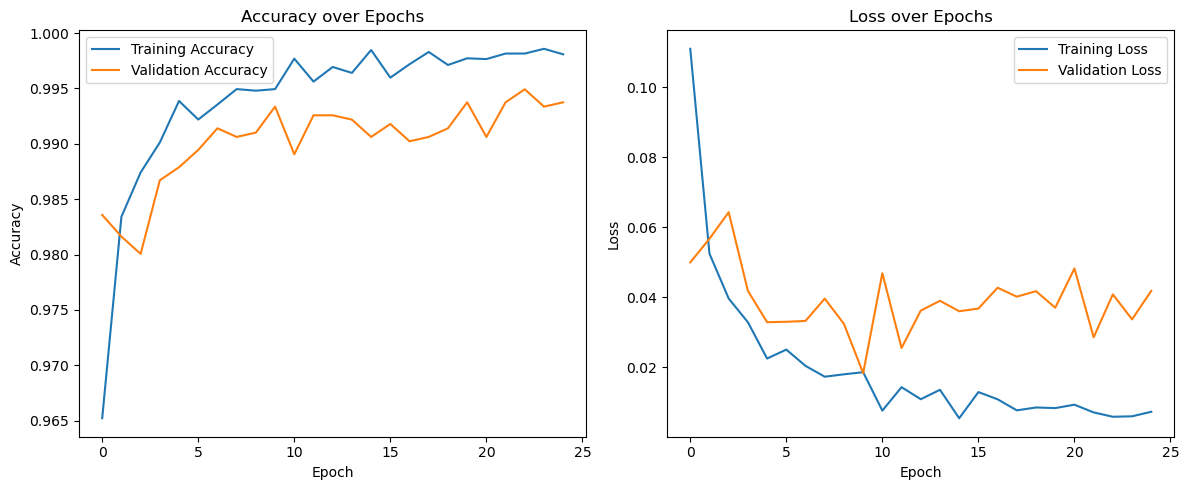

In [29]:
import matplotlib.pyplot as plt

# Accuracy Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


ADDing dropout and checking

In [30]:
model_new_4_dropout=keras.models.Sequential([
    keras.layers.Flatten( input_shape=[28,28]),
    keras.layers.Dense(100,kernel_initializer="he_normal",activation='elu'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100,kernel_initializer="he_normal",activation='elu'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100,kernel_initializer="he_normal",activation='elu'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100,kernel_initializer="he_normal",activation='elu'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100,kernel_initializer="he_normal",activation='elu'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(5,activation='softmax')
])

c:\Users\ramch\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_new_4_dropout.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [32]:
history=model_new_4_dropout.fit(x_train_4,y_train_4,validation_data=(x_valid_4,y_valid_4),epochs=25)

Epoch 1/25
877/877 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8818 - loss: 0.3554 - val_accuracy: 0.9769 - val_loss: 0.0920
Epoch 2/25
877/877 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9664 - loss: 0.1187 - val_accuracy: 0.9828 - val_loss: 0.0692
Epoch 3/25
877/877 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9723 - loss: 0.0866 - val_accuracy: 0.9844 - val_loss: 0.0519
Epoch 4/25
877/877 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9786 - loss: 0.0729 - val_accuracy: 0.9824 - val_loss: 0.0573
Epoch 5/25
877/877 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9805 - loss: 0.0646 - val_accuracy: 0.9871 - val_loss: 0.0439
Epoch 6/25
877/877 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9826 - loss: 0.0562 - val_accuracy: 0.9891 - val_loss: 0.0376
Epoch 7/25
877/877 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9856 - loss: 0.0485 - val_accuracy: 0.9875 - val_loss: 0.0454
Epoch 8/25
877/877 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9882 - loss: 0.0424 - val_accuracy: 0

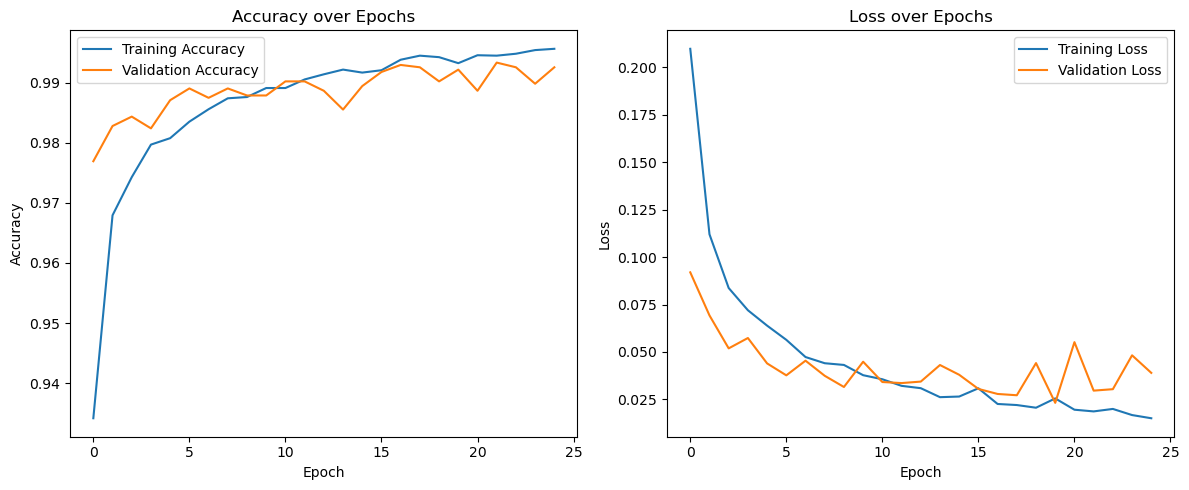

In [33]:
import matplotlib.pyplot as plt

# Accuracy Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Adding Batch Normalization

In [34]:
model_new_4_bn=keras.models.Sequential([
    keras.layers.Flatten( input_shape=[28,28]),
    keras.layers.Dense(100,kernel_initializer="he_normal",activation='elu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100,kernel_initializer="he_normal",activation='elu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100,kernel_initializer="he_normal",activation='elu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100,kernel_initializer="he_normal",activation='elu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100,kernel_initializer="he_normal",activation='elu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(5,activation='softmax')
])

c:\Users\ramch\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model_new_4_bn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history=model_new_4_bn.fit(x_train_4,y_train_4,validation_data=(x_valid_4,y_valid_4),epochs=25)

Epoch 1/25
877/877 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9279 - loss: 0.2167 - val_accuracy: 0.9812 - val_loss: 0.0521
Epoch 2/25
877/877 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9777 - loss: 0.0735 - val_accuracy: 0.9871 - val_loss: 0.0377
Epoch 3/25
877/877 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9848 - loss: 0.0506 - val_accuracy: 0.9902 - val_loss: 0.0321
Epoch 4/25
877/877 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9872 - loss: 0.0408 - val_accuracy: 0.9898 - val_loss: 0.0370
Epoch 5/25
877/877 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9885 - loss: 0.0343 - val_accuracy: 0.9887 - val_loss: 0.0424
Epoch 6/25
877/877 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9915 - loss: 0.0262 - val_accuracy: 0.9898 - val_loss: 0.0344
Epoch 7/25
877/877 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9915 - loss: 0.0283 - val_accuracy: 0.9926 - val_loss: 0.0280
Epoch 8/25
877/877 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9925 - loss: 0.0232 - val_accuracy: 0.

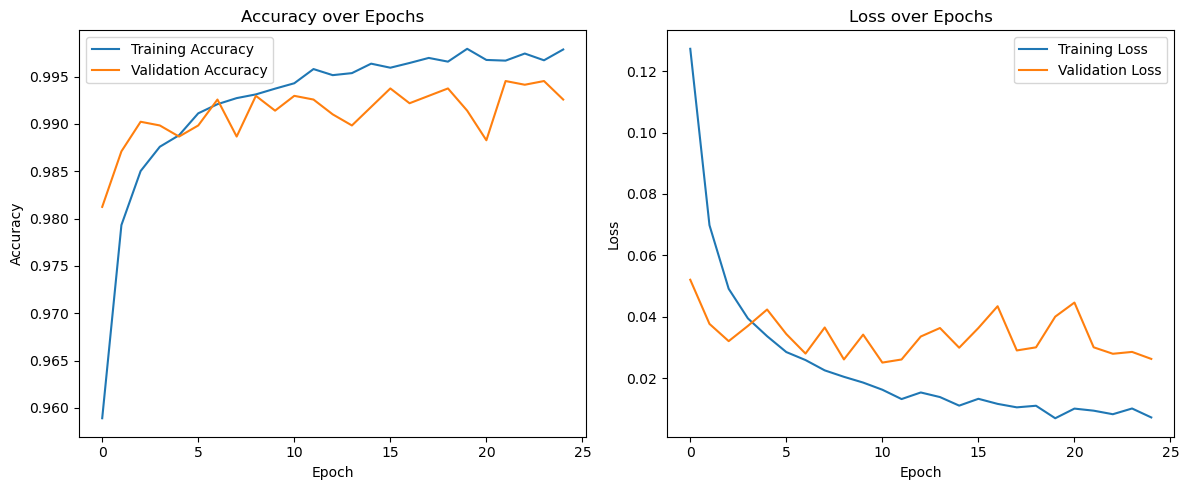

In [36]:
import matplotlib.pyplot as plt

# Accuracy Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [37]:
model_new_4.evaluate(X_test_4,y_test_4)
model_new_4_dropout.evaluate(X_test_4,y_test_4)
model_new_4_bn.evaluate(X_test_4,y_test_4)


161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9884 - loss: 0.0732
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9941 - loss: 0.0409
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9951 - loss: 0.0254


[0.02391168475151062, 0.9937731027603149]

In [262]:
model_new_4.save('simple_mnist_5hd(100).h5')
model_new_4_bn.save('simple_mnist_5hd_BN(100).h5')
model_new_4_dropout.save('simple_mnist_5hd_dropout(100).h5')

NEW Code For the Transfer learning

In [244]:
model_c=keras.models.clone_model(model_new_4)
model_c.set_weights=model_new_4.get_weights

In [245]:
model_5=keras.models.Sequential(model_c.layers[:-1])


In [246]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Combine train and test for a larger pool (optional)
x_all = np.concatenate((x_train, x_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)

# Number of samples per digit
samples_per_digit = 300

# Create empty lists to collect samples
x_subset = []
y_subset = []

# Loop through digits 0 to 9
for digit in range(10):
    indices = np.where(y_all == digit)[0]
    selected_indices = np.random.choice(indices, samples_per_digit, replace=False)
    x_subset.append(x_all[selected_indices])
    y_subset.append(y_all[selected_indices])

# Stack the final subset
x_subset = np.vstack(x_subset)
y_subset = np.hstack(y_subset)

# Shuffle the dataset
shuffled_indices = np.random.permutation(len(y_subset))
x_subset = x_subset[shuffled_indices]
y_subset = y_subset[shuffled_indices]

print("Subset shape:", x_subset.shape, y_subset.shape)


Subset shape: (3000, 28, 28) (3000,)


In [247]:
from sklearn.model_selection import train_test_split
X_tn, X_tt, y_tn_9, y_tt_9=train_test_split(x_subset,y_subset,test_size=0.2, random_state=42)
X_tn.shape

(2400, 28, 28)

In [248]:

y_tn_9.shape

(2400,)

In [249]:
X_test = X_test / 255.0
x_vd_9,x_tn_9=X_tn[:400]/255.0,X_tn[400:]/255.0
y_vd_9,y_trn_9=y_tn_9[:400],y_tn_9[400:]


In [250]:
model_5.add(keras.layers.Dense(10,activation='softmax'))

In [251]:
for layer in model_5.layers[:-1]:
    layer.trainable=False
model_5.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [252]:
model_5.fit(x_tn_9,y_trn_9,validation_data=(x_vd_9,y_vd_9),epochs=30)

Epoch 1/30


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1625 - loss: 2.5130 - val_accuracy: 0.2700 - val_loss: 2.0328
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3846 - loss: 1.8340 - val_accuracy: 0.4575 - val_loss: 1.7011
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5163 - loss: 1.5577 - val_accuracy: 0.5275 - val_loss: 1.5007
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5820 - loss: 1.3761 - val_accuracy: 0.5850 - val_loss: 1.3711
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6151 - loss: 1.2553 - val_accuracy: 0.6175 - val_loss: 1.2770
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6569 - loss: 1.1715 - val_accuracy: 0.6475 - val_loss: 1.2101
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6768 - loss: 1.1075 - val_accuracy: 0.6600 - val_loss: 1.1553
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6696 - loss: 1.0925 - val_accuracy: 0.6650 - val_loss: 1.1138
Epo

In [253]:
for layer in model_5.layers[:-1]:
    layer.trainable=True
model_5.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [254]:
model_5.fit(x_tn_9,y_trn_9,validation_data=(x_vd_9,y_vd_9),epochs=30)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7380 - loss: 0.7282 - val_accuracy: 0.8775 - val_loss: 0.4591
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9239 - loss: 0.2528 - val_accuracy: 0.8900 - val_loss: 0.4138
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9397 - loss: 0.1764 - val_accuracy: 0.8875 - val_loss: 0.4735
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9621 - loss: 0.1162 - val_accuracy: 0.9150 - val_loss: 0.4161
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9807 - loss: 0.0689 - val_accuracy: 0.9100 - val_loss: 0.4619
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9880 - loss: 0.0446 - val_accuracy: 0.9125 - val_loss: 0.4191
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9921 - loss: 0.0367 - val_accuracy: 0.9175 - val_loss: 0.4060
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9956 - loss: 0.0224 - val_accuracy: 0.9175 - val_loss:

In [255]:
model_5.evaluate(X_tt,y_tt_9)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.7251 - loss: 53.1324


[54.96001434326172, 0.7283333539962769]

In [256]:
X_nw=X_tt[15:40]
y_r=y_tt_9[15:40]
y_proba=model_5.predict(X_nw)
y_pred = np.argmax(y_proba, axis=1)
print(y_pred)
print(y_r)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[4 6 0 2 9 1 4 3 3 4 3 3 9 7 4 3 5 0 3 8 3 2 3 5 7]
[4 6 0 7 9 1 4 3 1 4 1 8 9 7 4 2 5 0 2 8 3 2 3 5 7]


USing only Four hidden layers from the past model

In [257]:
model_54=keras.models.Sequential(model_c.layers[:-2])
model_54.add(keras.layers.Dense(10,activation='softmax'))

In [258]:
for layer in model_54.layers[:-1]:
    layer.trainable=False
model_54.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model_54.fit(x_tn_9,y_trn_9,validation_data=(x_vd_9,y_vd_9),epochs=30)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2869 - loss: 2.3298 - val_accuracy: 0.7525 - val_loss: 0.8946
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8154 - loss: 0.6872 - val_accuracy: 0.8650 - val_loss: 0.5240
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9273 - loss: 0.3448 - val_accuracy: 0.8975 - val_loss: 0.4157
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9590 - loss: 0.2227 - val_accuracy: 0.9100 - val_loss: 0.3720
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9718 - loss: 0.1754 - val_accuracy: 0.9125 - val_loss: 0.3488
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9788 - loss: 0.1273 - val_accuracy: 0.9150 - val_loss: 0.3372
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9765 - loss: 0.1153 - val_accuracy: 0.9200 - val_loss: 0.3305
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9881 - loss: 0.0915 - val_accuracy: 0.9200 - val_loss:

In [259]:
for layer in model_54.layers[:-1]:
    layer.trainable=True
model_54.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model_54.fit(x_tn_9,y_trn_9,validation_data=(x_vd_9,y_vd_9),epochs=30)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9870 - loss: 0.0446 - val_accuracy: 0.8950 - val_loss: 0.5012
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9876 - loss: 0.0380 - val_accuracy: 0.9000 - val_loss: 0.5232
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9926 - loss: 0.0291 - val_accuracy: 0.9200 - val_loss: 0.4657
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9984 - loss: 0.0059 - val_accuracy: 0.9125 - val_loss: 0.5150
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.9200 - val_loss: 0.4666
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.4850e-04 - val_accuracy: 0.9250 - val_loss: 0.4652
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.7218e-04 - val_accuracy: 0.9250 - val_loss: 0.4710
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.4299e-04 - val_accuracy: 0.9275

In [260]:
model_54.evaluate(X_tt,y_tt_9)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.8711 - loss: 46.0961


[46.44610595703125, 0.8733333349227905]

In [261]:
X_nw=X_tt[15:40]
y_r=y_tt_9[15:40]
y_proba=model_54.predict(X_nw)
y_pred = np.argmax(y_proba, axis=1)
print(y_pred)
print(y_r)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[4 6 0 7 9 1 4 3 1 4 1 3 9 7 4 2 5 0 2 8 3 2 3 5 7]
[4 6 0 7 9 1 4 3 1 4 1 8 9 7 4 2 5 0 2 8 3 2 3 5 7]
